# Olympics dataset
In this project the Olympics dataset will be used to explore some insights into the data within.

## Sections:
#### Section 1 - Preprocessing
#### Section 2 - Data Visualization

In [1]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
data = pd.read_csv("C:\\Users\\heyle\\Documents\\Kaggle_Datasets\\Olympics.csv", engine = "python")
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


### Section 1 - Preprocessing

In [3]:
# check the null count for the dataframe
data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [4]:
# drop unrequired features
data.drop(["Sport", "Country"], axis = 1, inplace = True)

Sport can be derived from the event and discipline

Country can be derived from the country code

In [5]:
data

,City,Year,Discipline,Event,Athlete,Gender,Country_Code,Event_gender,Medal
0,Montreal,1976.0,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,W,Silver
1,Montreal,1976.0,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,M,Bronze
2,Montreal,1976.0,Diving,3m springboard,"BOGGS, Philip George",Men,USA,M,Gold
3,Montreal,1976.0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,M,Silver
4,Montreal,1976.0,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,W,Bronze
...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,M,Bronze
15429,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,M,Gold
15430,Beijing,2008.0,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,M,Silver
15431,Beijing,2008.0,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,M,Gold


In [6]:
# display the null values in a dataframe
dataCity = data[data.City.isnull()]
dataCity

,City,Year,Discipline,Event,Athlete,Gender,Country_Code,Event_gender,Medal
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe above shows that all the NaN values within the Olympics dataset are consecutive and thus should be disregarded.

In [7]:
# drop the null values from the original dataframe
data.dropna(inplace=True)

In [8]:
# check values after NaN values were dropped
data.isnull().sum()

City            0
Year            0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Event_gender    0
Medal           0
dtype: int64

In [9]:
data.Gender.unique()

array(['Women', 'Men'], dtype=object)

In [10]:
# map categorical values to binary form
data["Sex"] = data.Gender.map({"Women":0, "Men":1})
data["Event_Sex"] = data.Event_gender.map({"W":0, "M":1, "X":2})# 2 wil represent the X for event gender 
data["medal"] = data.Medal.map({"Gold":3, "Silver":2, "Bronze":1})
data

,City,Year,Discipline,Event,Athlete,Gender,Country_Code,Event_gender,Medal,Sex,Event_Sex,medal
0,Montreal,1976.0,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,W,Silver,0,0,2
1,Montreal,1976.0,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,M,Bronze,1,1,1
2,Montreal,1976.0,Diving,3m springboard,"BOGGS, Philip George",Men,USA,M,Gold,1,1,3
3,Montreal,1976.0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,M,Silver,1,1,2
4,Montreal,1976.0,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,W,Bronze,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,M,Bronze,1,1,1
15429,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,M,Gold,1,1,3
15430,Beijing,2008.0,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,M,Silver,1,1,2
15431,Beijing,2008.0,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,M,Gold,1,1,3


In [11]:
# drop the redundant features from the dataframe
data.drop(["Gender", "Event_gender", "Medal"], axis = 1, inplace = True)
data

,City,Year,Discipline,Event,Athlete,Country_Code,Sex,Event_Sex,medal
0,Montreal,1976.0,Diving,3m springboard,"KÖHLER, Christa",GDR,0,0,2
1,Montreal,1976.0,Diving,3m springboard,"KOSENKOV, Aleksandr",URS,1,1,1
2,Montreal,1976.0,Diving,3m springboard,"BOGGS, Philip George",USA,1,1,3
3,Montreal,1976.0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",ITA,1,1,2
4,Montreal,1976.0,Diving,10m platform,"WILSON, Deborah Keplar",USA,0,0,1
...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",FRA,1,1,1
15429,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",GEO,1,1,3
15430,Beijing,2008.0,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",AZE,1,1,2
15431,Beijing,2008.0,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",FRA,1,1,3


In [12]:
# rename the medal feature
data.rename({"medal":"Medal"}, axis = 1, inplace = True)

In [13]:
data

,City,Year,Discipline,Event,Athlete,Country_Code,Sex,Event_Sex,Medal
0,Montreal,1976.0,Diving,3m springboard,"KÖHLER, Christa",GDR,0,0,2
1,Montreal,1976.0,Diving,3m springboard,"KOSENKOV, Aleksandr",URS,1,1,1
2,Montreal,1976.0,Diving,3m springboard,"BOGGS, Philip George",USA,1,1,3
3,Montreal,1976.0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",ITA,1,1,2
4,Montreal,1976.0,Diving,10m platform,"WILSON, Deborah Keplar",USA,0,0,1
...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",FRA,1,1,1
15429,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",GEO,1,1,3
15430,Beijing,2008.0,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",AZE,1,1,2
15431,Beijing,2008.0,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",FRA,1,1,3


### Section 2 - Data Visualization

Insight: How many gold medals were achieved by each country showing the top 10 of these countries?

Text(0, 0.5, 'Number of gold medals')

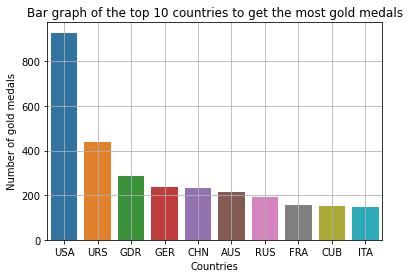

In [14]:
goldMedals = data[data.Medal == 3]# create a dataframe with all countries that have gold medals
top10 = goldMedals.Country_Code.value_counts()[0:10]# use the value counts function to get each countries nr of medals and sort the top 10

medalCountList = []# a list for the number of medals each country in the top 10 has
countryList = ["USA", "URS", "GDR", "GER", "CHN", "AUS", "RUS", "FRA", "CUB", "ITA"]

for line in top10:# iterate through the top 10 list and append the medal counts to the medalCountList
    medalCountList.append(line)
sns.barplot(x = countryList, y = medalCountList)# draw a bar graph with countries on the x axis and nr of medals on the y axis
plt.grid()
plt.title("Bar graph of the top 10 countries to get the most gold medals")
plt.xlabel("Countries")
plt.ylabel("Number of gold medals")

Conclusion: It can be seen that the United States of America got the most gold medals with arround 400 medals more than the Russian runner-ups.

Insight: How do gold medals achieved by the top 15 countries compare between male and female athletes?

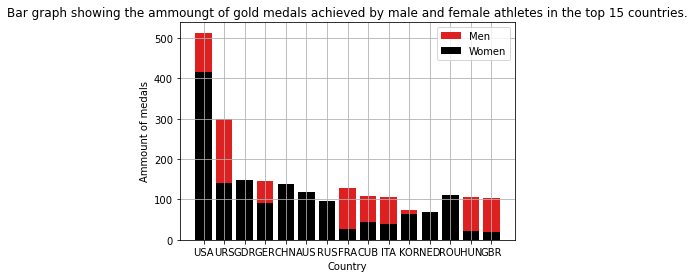

In [15]:
counter = 0# a counter to run the loop a limited ammount of times

maleMedalList = []# list of medals achieved by male athletes
femaleMedalList = []# list of medals achieved by female athletes
top15Countries = ["USA", "URS", "GDR", "GER", "CHN", "AUS", "RUS", "FRA", "CUB", "ITA", "KOR", "NED", "ROU", "HUN", "GBR"]# x-axis

goldMedalFrame = data[data.Medal == 3]# a derived dataframe of only athletes with gold medals
top15 = goldMedalFrame.Country_Code.value_counts()[0:15]# top 15 countries to get gold medals
goldMen = goldMedalFrame[goldMedalFrame.Sex == 1]# dataframe of men that got gold medals
goldWomen = goldMedalFrame[goldMedalFrame.Sex == 0]# dataframe of women that got gold medals

while counter != 15:# loop iterating through the created dataframes to isolate required information
    menCount = goldMen[goldMen.Country_Code == top15Countries[counter]].Country_Code.count()# gets the ammount of gold medals from each country attained by men
    womenCount = goldWomen[goldWomen.Country_Code == top15Countries[counter]].Country_Code.count()# gets the ammount of gold medals from each country attained by women
    
    maleMedalList.append(menCount)# append each number to the appropriate list
    femaleMedalList.append(womenCount)
    
    counter+=1# increment the counter
sns.barplot(top15Countries, maleMedalList, color = "red", label = "Men")# plot the graphs on the same axis
plt.bar(top15Countries, femaleMedalList, color = "black", label = "Women")
plt.legend()
plt.title("Bar graph showing the ammoungt of gold medals achieved by male and female athletes in the top 15 countries.")
plt.xlabel("Country")
plt.ylabel("Ammount of medals")
plt.grid()

Conclusion: Overall male athletes achieved more gold medals than female athletes in the Olympics.

Insight: How does the male to female athlete ratio in each Olympic games compare over the years?

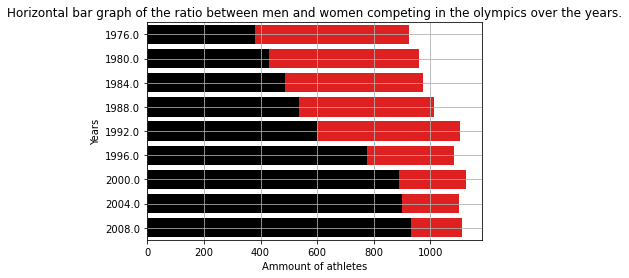

In [16]:
yearArr = data.Year.unique()# isolate each year the olympics took place from 1976 to 2008

menRatList = []# a list to contain the ammount of men competing each year
womenRatList = []# a list to contain the ammount of women competing each year
counter = 0# a counter to limit the loops ammount of iterations

while counter != 9:# a while loop to run through each years dataframe
    specYear = data[data.Year == yearArr[counter]]# isolate the correct year using the yearArr and counter identity
    womenSpecYear = specYear[specYear.Sex == 0].Sex.count()# count the female athletes in the specific year
    menSpecYear = specYear[specYear.Sex == 1].Sex.count()# count the male athletes in the specific year
    
    menRatList.append(menSpecYear)# append the ammount of male athletes to the list
    womenRatList.append(womenSpecYear)# append the ammount of female athletes to the list
    
    counter+=1# increment the counter
sns.barplot(x = menRatList, y = yearArr, orient="h", color = "red", label = "Men")# plot the data onto the same axis using a bar graph
sns.barplot(x = womenRatList, y = yearArr, orient="h", color = "black", label = "Women")
plt.title("Horizontal bar graph of the ratio between men and women competing in the olympics over the years.")
plt.xlabel("Ammount of athletes")
plt.ylabel("Years")
plt.grid()

Conclusion: Over the years since 1976 the ratio between male and female athletes has gotten smaller.

Insight: How many medals did the top 7 countries earn?

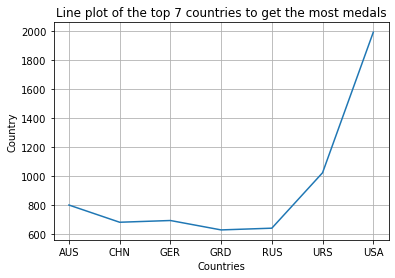

In [17]:
top7 = data.Country_Code.value_counts()[0:7]# find the top 7 countries to achieve the most medals overall
country7List = ["USA", "URS", "AUS", "GER", "CHN", "RUS", "GRD"]# a list of the top 7 countries to get the highest ammount of medals

sns.lineplot(x = country7List, y = top7)# plot the line plot using the country list as the x-axis and the top 7 countries' medal count on the y-axis
plt.title("Line plot of the top 7 countries to get the most medals")
plt.xlabel("Countries")
plt.ylabel("Country")
plt.grid()

Conclusion: The United States of America achieved the most medals overall in the Olympics with Russia again being the runner-up.

In [18]:
data

,City,Year,Discipline,Event,Athlete,Country_Code,Sex,Event_Sex,Medal
0,Montreal,1976.0,Diving,3m springboard,"KÖHLER, Christa",GDR,0,0,2
1,Montreal,1976.0,Diving,3m springboard,"KOSENKOV, Aleksandr",URS,1,1,1
2,Montreal,1976.0,Diving,3m springboard,"BOGGS, Philip George",USA,1,1,3
3,Montreal,1976.0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",ITA,1,1,2
4,Montreal,1976.0,Diving,10m platform,"WILSON, Deborah Keplar",USA,0,0,1
...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",FRA,1,1,1
15429,Beijing,2008.0,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",GEO,1,1,3
15430,Beijing,2008.0,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",AZE,1,1,2
15431,Beijing,2008.0,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",FRA,1,1,3


Insight: Who won the 200m breaststroke in both the men and womens division in the 1976 Olympics?

In [25]:
y1976 = data[data.Year == 1976]
bStroke = y1976[y1976.Event == "200m breaststroke"]
bStroke[bStroke.Medal == 3]

,City,Year,Discipline,Event,Athlete,Country_Code,Sex,Event_Sex,Medal
39,Montreal,1976.0,Swimming,200m breaststroke,"KOSHEVAYA, Marina",URS,0,0,3
50,Montreal,1976.0,Swimming,200m breaststroke,"WILKIE, David Andrew",GBR,1,1,3
